In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.ndimage.filters import convolve1d
from scipy.signal import butter, filtfilt
from scipy.signal.windows import exponential, gaussian
from sklearn.metrics import mean_squared_error

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (12, 8)

### daily total female births

In [3]:
filepath = 'daily_total_female_births.csv'
df = pd.read_csv(filepath, header=0)
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


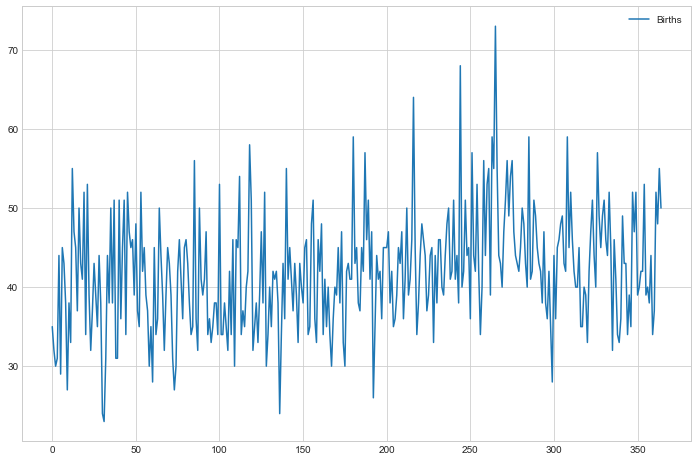

In [4]:
df.plot(figsize=figsize)
plt.show()

In [5]:
rolling = df.rolling(window=3)
type(rolling)

pandas.core.window.rolling.Rolling

In [6]:
rolling_mean = rolling.mean()
rolling_mean.head()

,Births
0,NaN
1,NaN
2,32.333333
3,31.000000
4,35.000000


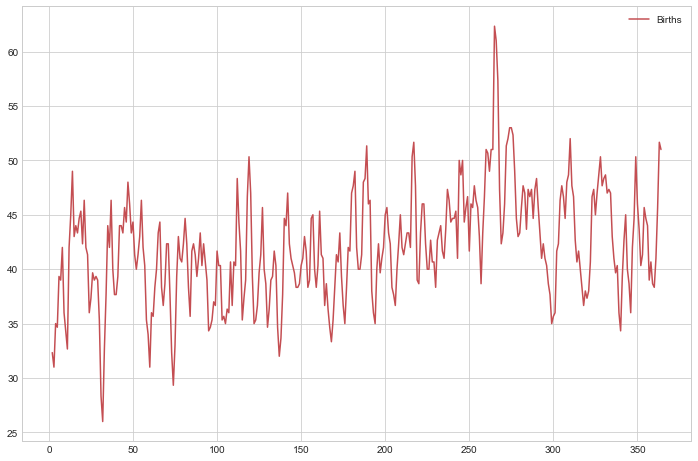

In [7]:
rolling_mean.plot(color='r', figsize=figsize)
plt.show()

### sin function with noise

In [8]:
start = 0
end = 8
n_points = 2**10
delta = (end - start) / n_points

X = np.linspace(start, end, n_points)

signal = np.sin(2 * np.pi * X)

sigma = 0.5
noise = np.random.normal(scale=sigma, size=n_points)

Y = signal + noise

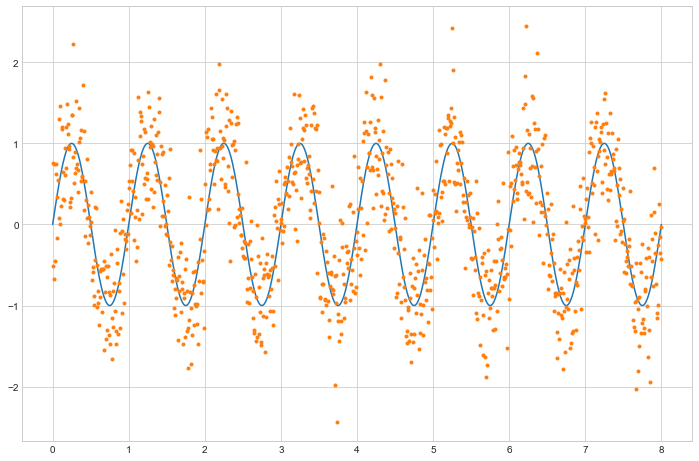

In [9]:
plt.figure(figsize=figsize)
plt.plot(X, signal)
plt.plot(X, Y, ls='none', marker='.')
plt.show()

### smoothing by exponential window

In [10]:
center = 0
m = 39
tau = -(m - 1) / np.log(0.01)
exp_window = exponential(m, 0, tau, sym=False)

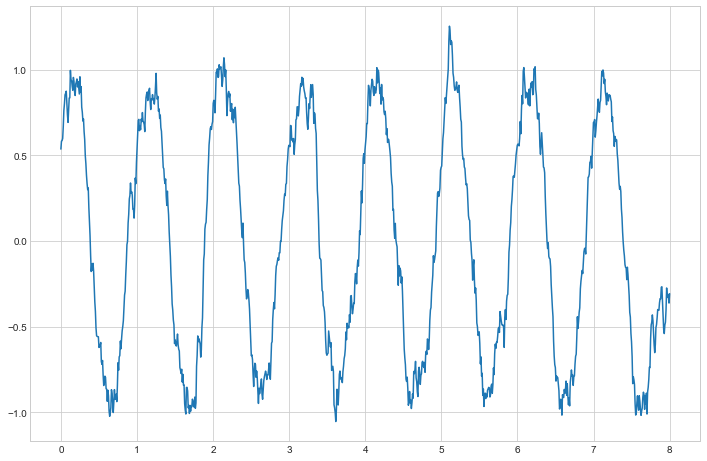

In [11]:
Y_by_exp_window = convolve1d(Y, exp_window / exp_window.sum())
plt.figure(figsize=figsize)
plt.plot(X, Y_by_exp_window)
plt.show()

In [12]:
mean_squared_error(Y, Y_by_exp_window, squared=False)

0.625861920487421

### smoothing by gaussian window

In [13]:
std = 5
gau_window = gaussian(m, std)

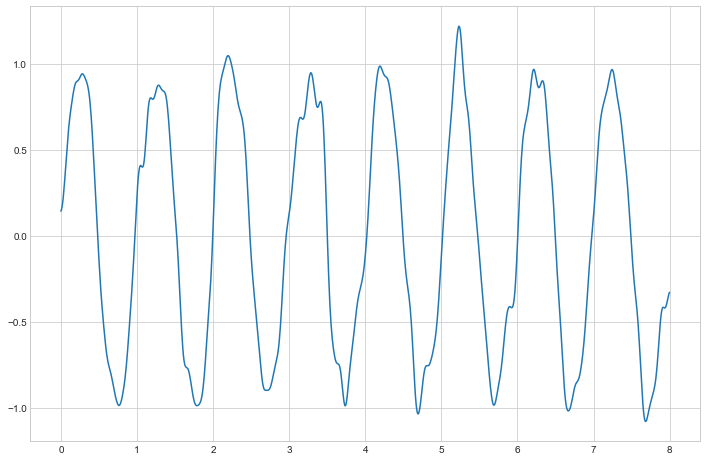

In [14]:
Y_by_gau_window = convolve1d(Y, gau_window / gau_window.sum())
plt.figure(figsize=figsize)
plt.plot(X, Y_by_gau_window)
plt.show()

In [15]:
mean_squared_error(Y, Y_by_gau_window, squared=False)

0.45245162411253537

### smoothing by butter, filtfilt

In [16]:
nyf = 0.5 / delta
b, a = butter(4, 1.5 / nyf)
b, a

(array([1.67154461e-06, 6.68617844e-06, 1.00292677e-05, 6.68617844e-06,
        1.67154461e-06]),
 array([ 1.        , -3.80761377,  5.44113178, -3.45842005,  0.82492878]))

[]

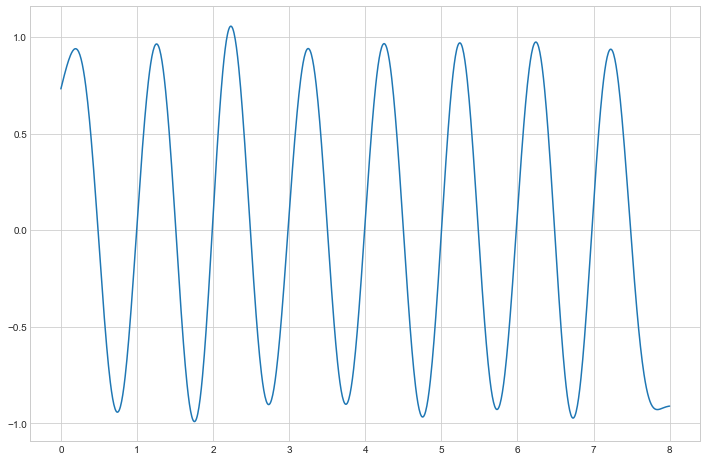

In [17]:
Y_by_filtfilt = filtfilt(b, a, Y)
plt.figure(figsize=figsize)
plt.plot(X, Y_by_filtfilt)
plt.plot()

In [18]:
mean_squared_error(Y, Y_by_filtfilt, squared=False)

0.48497719285581425